<a href="https://colab.research.google.com/github/colleenrpy/MONAI_handson/blob/main/Getting%20Started%20with%20MONAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Project-MONAI/MONAIBootcamp2021/blob/main/day1/monai.png?raw=1" style="width: 700px;"/>

MONAIハンズオンセミナーへようこそ! このノートブックでは、MONAIのデザインとアーキテクチャを紹介し、その後、そのトランスフォームをハンズオンします。

### Google Colabの使用

このノートブックにはMONAIをインストールするためのpipコマンドがあり、それ以降のノートブックには追加されます。

**Colabの実行に必要なパッケージ**。

colabノートブックの初回実行時にMONAIをインストールするために、以下のセルを実行します：


In [1]:
!pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==0.6.0"

     |████████████████████████████████| 584 kB 27.9 MB/s 
     |████████████████████████████████| 221 kB 72.3 MB/s 


**GPUサポートの有効化**

ColabでGPUリソースを使用するには、ランタイムをGPUに変更します。

1. 1. "Runtime "**メニューから、**"Change Runtime Type "**を選択します。
2. ドロップダウン・メニューから **"GPU "** を選択します。
3. **"SAVE "**をクリックします。

これにより、ノートブックがリセットされ、おそらくあなたがロボットであるかどうか尋ねられるでしょう（この手順は、あなたがそうでないと仮定しています）。

**!nvidia-smi**

をセルで実行すると、これがうまくいったかどうかが確認でき、あなたがどのようなハードウェアにアクセスできるかがわかります。  

In [2]:
!nvidia-smi

Thu Oct 13 02:50:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# MONAIを始めるにあたって
---

MONAIは、PyTorchエコシステムの一部である、ヘルスケアイメージングの深層学習のためのPyTorchベースのオープンソースフレームワークです。

*目的は以下の通りです：*

- 学術、産業、臨床の研究者が共通の基盤の上で協力し合うコミュニティの構築
- ヘルスケアイメージングのための最先端のエンドツーエンドのトレーニングワークフローの構築
- 深層学習モデルを作成・評価するための最適化・標準化された方法を研究者に提供すること

MONAIは、医療画像解析における深層学習を複数の粒度で支援することを目的としています。この図は、医療用深層学習領域におけるエンドツーエンドのワークフローの典型的な例を示しています：

<img src="https://github.com/Project-MONAI/MONAIBootcamp2021/blob/main/day1/end_to_end.png?raw=1" style="width: 700px;"/>

## ニーズは何？

* バイオメディカルアプリケーションには特有の要求がある。
* 画像モダリティ（MR、CT、US など）には、特有のデータ処理が必要である。
* データフォーマット（DICOM、NIfTI など）は医療用途に特化したものであり、特別なサポートを必要とする。
* 特定のネットワークアーキテクチャは、バイオメディカルアプリケーションのために設計されているか、または非常に適している。
* バイオメディカルアプリケーションや画像モダリティに特有のデータ変換は、データの前処理、学習時のデータ拡張、後処理に非常に有効である。
* 再現性のある科学には再現性のある実験が必要であり、そのためには他の科学者がアクセス可能なソフトウェアに依存する。
* これらの要求に対する解決策を提供するコミュニティ主導のライブラリは、重複や再実装を減らすことができる。
* 一般的なネットワークのベースライン実装と、特定の論文に特化したネットワークの実装により、他のネットワークや結果との比較の基礎を提供する

## MONAIはどのようにこのニーズに応えるのか？

MONAIは、Pytorchと互換性のある方法で、これらのニーズを満たす深層学習施設とインフラストラクチャのフレームワークを提供する。
* バイオメディカルファイルタイプのデータ読み込みと処理ライブラリ
* 学習前、学習中、学習後の画像データを処理し、正則化し、拡張するための大規模なデータ変換のセット
* 一般的なアーキテクチャを実装した汎用ネットワーク，メトリック，損失関数定義ライブラリ
* 計算機インフラを効率的に利用するための学習・推論用既製コンポーネント群

MONAIは、実験の訓練と配布を容易にすることで、再現性に貢献する。
* 異なるユーザーの実装間で共通の基本フレームワークにより、比較・相互運用性を高めることができる。
* ユーザは、コンポーネントや既存のネットワークを選択し、新しいコードを提供することで、その結果を他のユーザが利用できるようにすることができる。
* 論文に掲載されたネットワークの参照実装は、再現研究と比較のためのベースラインを提供する。



## MONAIアーキテクチャ
MONAIの設計原理は様々な専門知識を持つユーザのために柔軟で軽量なAPIを提供することです。全てのコアコンポーネントは独立したモジュールで、これらは任意の既存のPyTorchプログラムに容易に統合できます。
ユーザは、研究実験のための堅固な訓練や評価プログラムを素早くセットアップするために MONAI のワークフローを活用できます。
主要な機能を実演するために豊富なサンプルとデモが提供されます。
COVID-19画像解析、モデル並列等を含む、最新の研究課題のための最先端技術に基づいて研究者が実装を提供しています。
全体的なアーキテクチャとモジュールは次の図で示されます :

<img src="https://github.com/Project-MONAI/MONAIBootcamp2021/blob/main/day1/arch_modules_v0.4.png?raw=1" style="width: 700px;"/>

## MONAIの設計思想

主要な原則：
* MONAIはPyTorchのように見え、PyTorchの型を利用・拡張し、PyTorchの一般的な設計思想を遵守しています。
* MONAIはPyTorchの上に追加され、拡張やラッパーを提供します。
* MONAIは、オプトインとインクリメンタルで、既存のコードを統合するためにモデル全体を書き換える必要はありません。
* MONAIは協調的であり、アダプタや疎結合のコンポーネントを提供し、サードパーティのコードとの統合を容易にします。
* MONAIは、PyTorchのエコシステムと友好的であり、公式エコシステムの一部です。




## MONAI Transforms

MONAI Transformsについてより深くご理解いただくために、このガイドでは5つの重要な質問に回答することに役に立つ：

1. **トレーニングのためのデータパイプラインを作成するために、どのようなトランスフォームが利用できますか？**
2. **配列変換とは何ですか？**
3. **カスタム変換を作成するために必要なことは何ですか？**
4. **辞書変換とは何ですか？**
5. **MONAI の基本的なデータセットを、どのように変換して作成すればよいですか？**

Dependeciesをインポートすることから始めましょう。 このノートブックの残りの部分に必要なものをすべてここでロードすることになります。 たくさんのimport文が出てきますが、このノートブックの残りの部分を通して、それぞれの文の内容を確認していくことにします。

In [3]:
import tempfile
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Any, Mapping, Hashable

import monai
from monai.config import print_config, KeysCollection
from monai.utils import first
from monai.data import Dataset, ArrayDataset, create_test_image_3d, DataLoader
from monai.transforms import (
    Transform,
    MapTransform,
    Randomizable,
    AddChannel,
    AddChanneld,
    Compose,
    LoadImage,
    LoadImaged,
    Lambda,
    Lambdad,
    RandSpatialCrop,
    RandSpatialCropd,
    ToTensor,
    ToTensord,
    Orientation, 
    Rotate
)
print_config()

MONAI version: 0.6.0
Numpy version: 1.21.6
Pytorch version: 1.12.1+cu113
MONAI flags: HAS_EXT = False, USE_COMPILED = False
MONAI rev id: 0ad9e73639e30f4f1af5a1f4a45da9cb09930179

Optional dependencies:
Pytorch Ignite version: 0.4.5
Nibabel version: 3.0.2
scikit-image version: 0.18.3
Pillow version: 7.1.2
Tensorboard version: 2.9.1
gdown version: 4.4.0
TorchVision version: 0.13.1+cu113
ITK version: NOT INSTALLED or UNKNOWN VERSION.
tqdm version: 4.64.1
lmdb version: 0.99
psutil version: 5.4.8
pandas version: 1.3.5
einops version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



## **1. トレーニングのためのデータパイプラインを作成するために、どのようなトランスフォームが利用できますか？**

#### 医用画像データの入出力、処理、拡張について

医用画像は、入出力、前処理、拡張に高度に専門的な手法を必要とする。医療画像は、豊富なメタ情報を持つ特殊なフォーマットであることが多く、またデータ量も高次元であることが多い。そのため、慎重に設計された操作手順が必要となります。MONAIは、強力で柔軟な画像変換機能を持ち、ユーザーフレンドリーで再現性の高い、最適な医療データ前処理パイプラインを実現します。

<img src="https://github.com/Project-MONAI/MONAIBootcamp2021/blob/main/day1/medical_transforms.png?raw=1" style="width: 700px;"/>

#### 辞書と配列形式データの両方をサポートする変換

(torchvision のような) 広く使用されているコンピュータビジョン・パッケージは空間的に 2D な配列画像処理にフォーカスしています。MONAI は空間的に 2D と 3D の両方のためによりドメイン固有な変換を提供し、そして柔軟な変換 “compose” 機能を保持しています。

医用画像前処理は追加の極め細かいシステムパラメータを必要とすることが多いので、MONAI は python 辞書にカプセル化された入力データのための変換を提供します。ユーザは複雑な変換を構成するために想定されるデータフィールドに対応するキーとシステムパラメータを指定できます。

6 つのカテゴリー内の変換の豊富なセットがあります : Crop & Pad, 強度, IO, 後処理, Spatial とユティリティです。詳細は、[MONAI の変換の全て](https://docs.monai.io/en/latest/transforms.html) にアクセスしてください。

#### 医療に特化した変換
MONAI は包括的な医療に特化した変換を提供することを目的としています。これらが現在、例えば以下を含みます :

    - LoadImage：指定されたパスから医療用フォーマットファイルを読み込む
    - Spacing:入力画像を指定された pixdim に再サンプルします。
    - Orientation：画像の向きを指定されたaxcodesに変更する
    - RandGaussianNoise：統計的なノイズを加えて画像の強度に摂動を与える
    - NormalizeIntensity: 平均と標準偏差に基づく強度の正規化
    - Affine： アフィンパラメータに基づく画像変換
    - Rand2DElastic: ランダムな弾性変形と2次元のアフィン化
    - Rand3DElastic: ランダム弾性変形と3次元アフィン

一時ディレクトリを作成し、その中にランダムに並べられた球体を含むNiftiファイル形式の画像例をいくつか入れます。 また、このノートブックの後半で使用する、マッチングセグメンテーションペアを作成します。

In [4]:
fn_keys = ("img", "seg")  # filename keys for image and seg files

root_dir = tempfile.mkdtemp()
filenames = []

for i in range(5):
    im, seg = create_test_image_3d(256, 256, 256, num_objs=25, rad_max=50)

    im_filename = f"{root_dir}/im{i}.nii.gz"
    seg_filename = f"{root_dir}/seg{i}.nii.gz"
    filenames.append({"img": im_filename, "seg": seg_filename})

    n = nib.Nifti1Image(im, np.eye(4))
    nib.save(n, im_filename)

    n = nib.Nifti1Image(seg, np.eye(4))
    nib.save(n, seg_filename)

## **2. 配列変換とは？**

MONAI の Transform は、データセットの初期データや以前の Transform を入力とする、呼び出し可能なオブジェクトです。MONAI のコンポーネントは可能な限り非連続的に設計されているため、インフラやシステムの設定なしに、これらを直接作成し、呼び出すことができます。例えば、Niftiファイルの1つを直接読み込むには、変換を作成して呼び出す必要があります。

トランスフォームは `Compose` で合成され、一連の処理を作成します。 `Compose` 自身が変換であるため、直接呼び出すこともできる。ここではimgの型は `numpy.ndarray` なので、学習データパイプラインの一部としてPytorchのテンソルに変換するには、一連の処理の最後の変換として `ToTensor` を実行することになります：

In [5]:
trans = Compose([LoadImage(image_only=True), AddChannel(), ToTensor()])
img = trans(filenames[0]["img"])
print(type(img), img.shape, img.get_device())

<class 'torch.Tensor'> torch.Size([1, 256, 256, 256]) -1


## **3. カスタム変換はどのように作成しますか？**
独自のカスタムtransform操作を定義するには、いくつかの方法があります。単純な callable を演算子として使用する場合、 `Lambda` を使用して、それを変換としてラップすることができます。この例では、1次元目（幅）の画像を合計して2次元の画像を生成する変換を定義します：

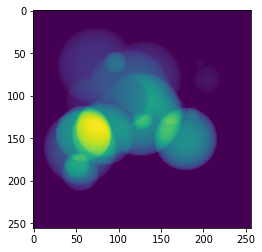

In [19]:
def sum_width(img):
    return img.sum(1)

trans = Compose([LoadImage(image_only=True), AddChannel(), Lambda(sum_width)])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

Transformのサブクラスを作るのが2番目の方法ですが、これはインスタンス化したオブジェクトで属性を定義できるという利点があります。選んだ次元の和を求めるクラスを定義し、それを使って2次元目（高さ）の和を求めることにしましょう：

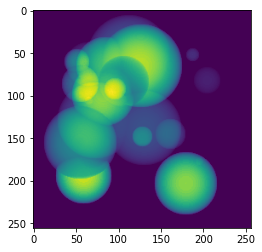

In [7]:
class SumDimension(Transform):
    def __init__(self, dim=1):
        self.dim = dim

    def __call__(self, inputs):
        return inputs.sum(self.dim)

trans = Compose([LoadImage(image_only=True), AddChannel(), SumDimension(2)])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

これまでの変換例はすべて決定的なものでしたが，入力データに対して確率的な操作を行う変換を定義するために， `Randomizable` クラスも継承することにします．このクラスは，変数のランダム化に利用されますが，決定的な変換と区別するためにも利用されます．このクラスがなぜ重要なのかは、後ほどデータローダーのキャッシュで説明します。

このクラスには `numpy.random.RandomState` オブジェクトがあり、確率的な値を提供します。これは `Randomizable.set_random_state()` で置き換えることができ、ランダム化処理を制御することができます。`randomize()` メソッドは、 `prob` 確率メンバに基づいて乱数処理を行うかどうかを判断し、行う場合にはランダムノイズ配列を生成します。この機能は、 `Compose` やその他の外部コントローラから呼び出されるように、このメソッドに用意されています。

とりあえず、ノイズを追加する簡単なトランスフォームを定義してみましょう。

**このセルを数回実行すると、ランダムな変換が50%の確率で適用されることが確認できます。**

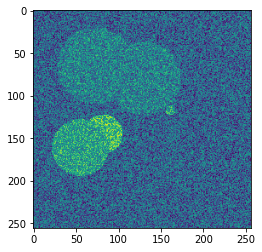

In [8]:
class RandAdditiveNoise(Randomizable, Transform):
    def __init__(self, prob: float = 0.5, max_add: float = 1.0) -> None:
        self.prob = np.clip(prob, 0.0, 1.0)
        self.max_add = max_add
        self._noise = 0

    def randomize(self, data: np.ndarray) -> None:
        self._noise = 0

        if self.R.random() < self.prob:
            noise_array = self.R.rand(*data.shape[1:])[None]
            self._noise = (noise_array * self.max_add).astype(data.dtype)

    def add_noise(self, img: np.ndarray) -> np.ndarray:
        return img + self._noise

    def __call__(self, img: np.ndarray) -> np.ndarray:
        self.randomize(img)
        return self.add_noise(img)

trans = Compose([LoadImage(image_only=True), AddChannel(), RandAdditiveNoise()])
img = trans(filenames[0]["img"])
plt.imshow(img[0, 128])

## **4. 辞書変換とは？**

これまで、個々のNumpy配列に適用される変換を見てきましたが、多くの学習スキームでは、複数の値を持つパイプラインが必要です。そこで、MONAIでは、配列の辞書を操作するための変換を、同等の配列変換ごとに1つずつ用意しています。例えば、画像にノイズを加えても、関連するラベル画像はそのままにしておくといったことが可能です。

このノートブックの最初のほうで、辞書に相当する変換のうち、その名前に `d` が付加されたものをインポートしましたので、このセクションではそれらの変換を使用します。 `LoadNiftid` の `keys` 引数は、Nifti ファイルへのパスを含むキーを指定するために使用され、入力辞書の他のすべての値は保持されます。このセットで、トランスフォームを呼び出したときに返されるキーを見ることができます。

In [9]:
trans = LoadImaged(keys=fn_keys)
data = trans(filenames[0])
print(list(data.keys()))

['img', 'seg', 'img_meta_dict', 'seg_meta_dict']


`Lambdad` は与えられた callable を `keys` で指定された各配列に個別に適用します。これを利用して、辞書内の異なる名前の値に対して、シーケンスの異なる時点で操作するトランスフォームを定義することができます：

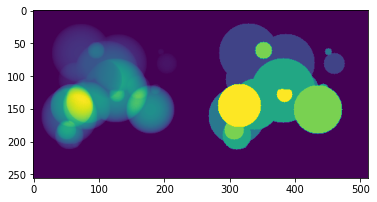

In [10]:
def sum_width(img):
    return img.sum(1)

def max_width(img):
    return img.max(1)

trans = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys), Lambdad(("img",), sum_width), Lambdad(("seg",), max_width)])

imgd = trans(filenames[0])
img = imgd["img"]
seg = imgd["seg"]

plt.imshow(np.hstack((img[0] * 5 / img.max(), seg[0])))

上記では、辞書のあるメンバーに対してある操作を適用し、別のメンバーに対しては別の操作を適用しています。これを1つの変換で合理的に再実装するには、どのメンバーにどの変換を適用するかの名前を保持し、1つのメソッドで操作を適用する必要があります。配列ベースの変換を辞書上で操作するように適応させるのは、比較的簡単です。

**このセルを数回実行すると、ランダムな変換が50%の確率で適用されることが確認できます。**

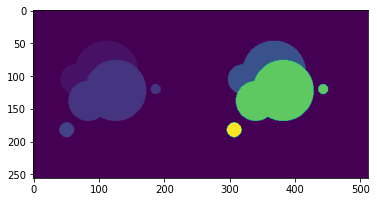

In [11]:
class RandAdditiveNoised(Randomizable, MapTransform):
    def __init__(
        self, keys: KeysCollection, prob: float = 0.5, max_add: float = 1.0
    ) -> None:
        super(Randomizable, self).__init__(keys)
        self.transform = RandAdditiveNoise(prob, max_add)

    def set_random_state(
        self, seed: Optional[int] = None, state: Optional[np.random.RandomState] = None
    ) -> "RandAdditiveNoised":
        self.transform.set_random_state(seed, state)
        super().set_random_state(seed, state)
        return self

    def randomize(self, data: Optional[Any] = None) -> None:
        self.transform.randomize(data)

    def __call__(
        self, data: Mapping[Hashable, np.ndarray]
    ) -> Mapping[Hashable, np.ndarray]:
        self.randomize(data[monai.utils.first(self.keys)])

        d = dict(data)
        for key in self.keys:
            d[key] = self.transform.add_noise(d[key])
        return d

trans = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys), RandAdditiveNoised(("img",))])
img = trans(filenames[0])
plt.imshow(np.hstack([img["img"][0, 50], img["seg"][0, 50]])) # We're adding random noise to the image, not the segmentation

メソッドのオーバーライドは、内部の `RandAdditiveNoise` インスタンスに振る舞いを委ねるために提供されています。
* set_random_state` はデリゲートとカレントオブジェクトの状態を設定します。
* `randomize` はランダム化を `RandAdditiveNoise` インスタンスに委譲します。
* `__call__` はデリゲートにランダム化を行わせ、辞書の各メンバーにその変換を適用します。デリゲートの変換は一度だけランダム化されます。これは、辞書の各メンバーに同じランダムフィールドが追加されることを保証しています。

## **5. 基本的なMONAIデータセットを変換して作成するにはどうしたら良いですか？**

さて、ここまでで変換について見てきましたが、次はデータセットについて見てみましょう。データソースとトランスフォームが定義できたので、次はデータセットオブジェクトを作成します。MONAI の基本クラスは `Dataset` で、ここでは画像の Nifti ファイルだけを読み込むために作成しました。

データセット` は Pytorch の同名のクラスを継承しており、選択されたアイテムに与えられた変換を適用する機能だけが追加されています。Pytorch のクラスをご存知の方なら、これは同じように動作します。

In [12]:
images = [fn["img"] for fn in filenames]

transform = Compose([LoadImage(image_only=True), AddChannel(), ToTensor()])
ds = Dataset(images, transform)
img_tensor = ds[0]
print(img_tensor.shape, img_tensor.get_device())

torch.Size([1, 256, 256, 256]) -1


MONAIでは、特に教師あり学習用に `ArrayDataset` を提供している。これは、画像のデータ配列と、セグメンテーションやラベルのデータ配列を、それぞれ別の変換で受け取ることができる。ここでは、画像とセグメンテーションのファイル名を分離して、この使い方を説明します：

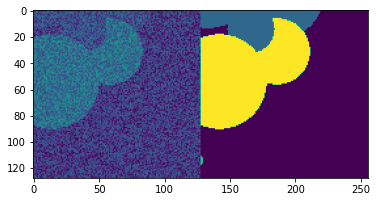

In [13]:
images = [fn["img"] for fn in filenames]
segs = [fn["seg"] for fn in filenames]

img_transform = Compose([LoadImage(image_only=True), AddChannel(), RandSpatialCrop((128, 128, 128), random_size=False), RandAdditiveNoise(), ToTensor()])
seg_transform = Compose([LoadImage(image_only=True), AddChannel(), RandSpatialCrop((128, 128, 128), random_size=False), ToTensor()])

ds = ArrayDataset(images, img_transform, segs, seg_transform)
im, seg = ds[0]
plt.imshow(np.hstack([im.numpy()[0, 48], seg.numpy()[0, 48]]))

データセットにアクセスすると、単一の画像を返す代わりに、それぞれの変換を経た後の画像とセグメンテーションを含むペアが生成されます。このクラスの重要な点のひとつは、各変換（この場合は `Compose` ）のランダムな状態を、適用する前にデータセットの状態に設定することです。これにより、各出力に対して同じランダムな処理が適用されるようになり、 `RandSpatialCrop` オペレーションが、セグメンテーションと同様に画像に対して同じクロップウィンドウを選択する理由となります。別々の変換を行うことで、画像には操作を適用して、セグメンテーションには適用しない（またはその逆）ということが可能になります。ただし、これらの非共有操作が共有操作の後に来るように注意してください。

また、 `Dataset` を辞書ベースの変換と組み合わせて使用することで、結果のマッピングを作成することができます。上記のような単純な入力と地面の真偽のペアを超えた学習アプリケーションには、こちらの方が適しています：

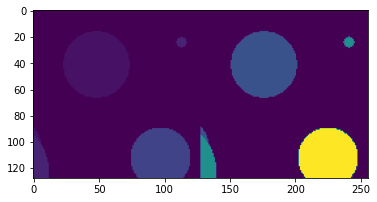

In [14]:
trans = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys), RandAdditiveNoised(("img",)), RandSpatialCropd(fn_keys, (128, 128, 128), random_size=False), ToTensord(fn_keys)])

ds = Dataset(filenames, trans)
item = ds[0]
im, seg = item["img"], item["seg"]
plt.imshow(np.hstack([im.numpy()[0, 48], seg.numpy()[0, 48]]))

データセットが定義できたので、次はデータバッチを作成するためのデータローダを作成します。これはPytorchの `DataLoader` クラスをそのまま継承していますが、デフォルトのコンストラクタの引数を少し変更しました。MONAIの機能はPyTorchのDataLoaderと互換性があるはずですが、我々がキーと考える、標準のDataLoaderクラスでは実現できない追加機能を含むためにサブクラス化されました。

`DataLoader`は、実際のデータをロードするために5つのワーカープロセスを使用します。MONAIは、このプロセスの効率を向上させるために、多くの `Dataset` サブクラスを提供しています。これらと他の機能は、以降のラボでカバーされます。

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


['img', 'seg', 'img_meta_dict', 'seg_meta_dict', 'img_transforms', 'seg_transforms'] torch.Size([5, 1, 128, 128, 128])


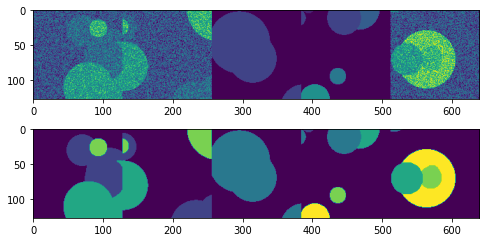

In [15]:
loader = DataLoader(ds, batch_size=10, num_workers=5)
batch = first(loader)
print(list(batch.keys()), batch["img"].shape)

f, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].imshow(np.hstack(batch["img"][:, 0, 64]))
ax[1].imshow(np.hstack(batch["seg"][:, 0, 64]))

## **まとめ**

MONAI Transformsについて説明しました。 いくつかの重要なハイライトを紹介します：

- MONAI では、医療に特化した多くのトランスフォームが利用可能である。
- トランスフォームには、配列と辞書のバージョンがある。
- 単純な呼び出し可能なラムダ関数や、transform をベースとしたクラスを作成し、独自のトランスフォームを作成することができる。
- MONAIデータセットを作成し、それに直接compose tranformチェーンを渡すことができる。

## **課題1**

ここで、独自の変換を作成し、それを合成配列に統合する練習をします。

与えられたサイズの入力画像からパッチを選択し、ランダムに選択された軸に沿ってこのデータを転置する変換を作成します。例えば、中央のパッチを水平方向に反転させ、残りの部分を変更しない画像を作成することができます。

前提条件
* 配列ランダム化変換として実装する
* デフォルトで40%の確率でクロップします。
* 検証のため、上記のテスト3D画像の1つを使用します。
* デフォルトのクロップサイズは100ですが、可変にすることができます。
* エッジケースは気にしない

以下は、あなたが実装する必要がある初期のクラス定義です。 また、あなたの機能が完全に実装された時点で動作するはずのコンポーズチェーンと画像可視化コールも含まれています。

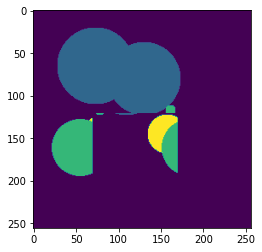

In [16]:
class RandFlipRect(Randomizable, Transform):
    """
    Define a transform to randomly transpose a patch of the input image along randomly chosen spatial dimensions. This 
    uses arguments `prob` for the probability the transform is applied, and `size` giving the size of the cube to flip.
    """
    def __init__(self, prob: float = 0.4, size: int = 100) -> None:
        self.prob = np.clip(prob, 0.0, 1.0)
        self.size = size

    def random_flip(self, data: np.ndarray) -> None:
        if self.R.random() < self.prob:
            height = data.shape[1]
            width = data.shape[2]
            depth = data.shape[3]
            
            x = self.R.randint(0, height - self.size)
            y = self.R.randint(0, width - self.size)
            z = self.R.randint(0, depth - self.size)
            patch = data[..., x: x + self.size , y: y + self.size, z: z + self.size]
            
            if self.R.random() < 0.333:
                patch=patch[...,::-1,:,:]
                
            if self.R.random() < 0.333:
                patch=patch[...,::-1,:]
                
            if self.R.random() < 0.333:
                patch=patch[...,::-1]
                
            data[..., x: x + self.size , y: y + self.size, z: z + self.size]=patch
            
        return data

    def __call__(self, img: np.ndarray) -> np.ndarray:
        return self.random_flip(img)
    
trans = Compose([LoadImage(image_only=True), AddChannel(), RandFlipRect()])
img = trans(filenames[0]["img"])
plt.imshow(img[0, img.shape[1]//2])

## **課題2**

以下のセルで、入力画像とセグメンテーションを受け取る、辞書ベースの変換パイプラインを定義し、それを確認します。
* 画像とセグメンテーションの配列は共にチャンネル次元を持つ。
* 各画像とセグメンテーションのペアは200x200x200ピクセルである。
* 各画像の値域は 0 から 1 の間である。
* 画像の d 型は float32 で，セグメンテーションの d 型は int32 である。
* 両者は最終的にテンソルとして生成される。

これらはすべて組み込みの変換で行えるので、ラムダ変換は必要ないはずです。パイプラインが動いたら、それを使ってデータセットとデータローダを作る。データローダー内のすべての値を繰り返し処理し、生成された辞書の画像とセグメンテーションのメンバがこれらの要件を満たしていることを確認します。

torch.Size([1, 200, 200, 200])
torch.float32 torch.int32
tensor(0.) tensor(1.)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
torch.Size([3, 1, 200, 200, 200])
torch.float32 torch.int32
tensor(0.) tensor(1.)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
torch.Size([2, 1, 200, 200, 200])
torch.float32 torch.int32
tensor(0.) tensor(1.)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)


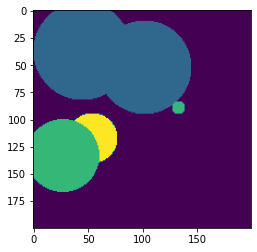

In [17]:
import torch
from monai.transforms import LoadImaged, CenterSpatialCropd, AddChanneld, ScaleIntensityd, CastToTyped, ToTensord

trans = Compose(
    [
        LoadImaged(fn_keys, image_only=True),
        AddChanneld(fn_keys),
        CenterSpatialCropd(fn_keys, 200),
        ScaleIntensityd(["img"]),
        CastToTyped(fn_keys, (np.float32, np.int32)),
        ToTensord(fn_keys),
    ]
)

data = trans(filenames[0])
img = data["img"]
seg = data["seg"]

print(img.shape)  # should be (1, 200, 200, 200)
print(img.dtype, seg.dtype)  # should be float32  int32
print(img.min(), img.max())  # should be 0.0 1.0
print(torch.unique(seg))  # should be [0 1 2 3 4 5]

plt.imshow(img[0, img.shape[1] // 2])

# construct dataset and dataloder here and iterate over batches, batch_size of 1 should be used

ds = Dataset(filenames,transform=trans)
loader= DataLoader(ds,batch_size=3)

for batch in loader:
    img = batch["img"]
    seg = batch["seg"]

    print(img.shape)  # should be (3, 1, 200, 200, 200) and (2, 1, 200, 200, 200) - first batch has 3, second has 2.
    print(img.dtype, seg.dtype)  # should be float32  int32
    print(img.min(), img.max())  # should be 0.0 1.0
    print(torch.unique(seg))  # should be [0 1 2 3 4 5]    

## **次のステップ**

次のノートブックでは、データセットとデータセットキャッシングのより高度な使い方を説明します。

ここで取り上げた内容については、[MONAI ドキュメントページ](https://docs.monai.io/) で詳しく説明しています。 

もし、より多くの例やチュートリアルをお探しなら、それ専用のレポを用意しています!  GitHub組織ページ](https://github.com/Project-MONAI/tutorials)で見つけることができます。